In [27]:
#!pip install tensorflow

In [29]:
#!pip install keras

In [3]:
# Create your first MLP in Keras
#from tensorflow.keras import Sequential

import pandas as pd
import numpy
import keras
from keras.models import Sequential
from keras.layers import Dense

In [4]:
df = pd.read_csv("dia_clean.csv")
df

,Unnamed: 0,preg,plas,pres,skin,mass,pedi,age,class
0,0,6,148.0,72.0,35.0,33.6,0.627,50,1
1,1,1,85.0,66.0,29.0,26.6,0.351,31,0
2,2,8,183.0,64.0,29.0,23.3,0.672,32,1
3,3,1,89.0,66.0,23.0,28.1,0.167,21,0
4,4,0,137.0,40.0,35.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
728,763,10,101.0,76.0,48.0,32.9,0.171,63,0
729,764,2,122.0,70.0,27.0,36.8,0.340,27,0
730,765,5,121.0,72.0,23.0,26.2,0.245,30,0
731,766,1,126.0,60.0,29.0,30.1,0.349,47,1


In [5]:
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

X = df.iloc[:,0:8].values
Y = df.iloc[:,8].values
X

array([[0.00e+00, 6.00e+00, 1.48e+02, ..., 3.36e+01, 6.27e-01, 5.00e+01],
       [1.00e+00, 1.00e+00, 8.50e+01, ..., 2.66e+01, 3.51e-01, 3.10e+01],
       [2.00e+00, 8.00e+00, 1.83e+02, ..., 2.33e+01, 6.72e-01, 3.20e+01],
       ...,
       [7.65e+02, 5.00e+00, 1.21e+02, ..., 2.62e+01, 2.45e-01, 3.00e+01],
       [7.66e+02, 1.00e+00, 1.26e+02, ..., 3.01e+01, 3.49e-01, 4.70e+01],
       [7.67e+02, 1.00e+00, 9.30e+01, ..., 3.04e+01, 3.15e-01, 2.30e+01]])

In [6]:
# create model
model = Sequential()
model.add(Dense(10, input_dim=8,  activation='sigmoid')) # Add 1st hidden layer
model.add(Dense(6,  activation='sigmoid'))         #2nd hidden layer
model.add(Dense(4,  activation='sigmoid'))         #3rd hidden layer
model.add(Dense(1, activation='sigmoid'))         #4th layer or output layer

C:\Users\shiva\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
# Compile model
model.compile(loss='binary_crossentropy',  \
              optimizer='adam', metrics=['accuracy'])

In [8]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 10)                  │              90 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 6)                   │              66 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 4)                   │              28 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 189 (756.00 B)

 Trainable params: 189 (756.00 B)

 Non-trainable params: 0 (0.00 B)

In [9]:
# Fit the model
history = model.fit(X, Y, validation_split=0.33,\
                    epochs=200, batch_size=20)

Epoch 1/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.6810 - loss: 0.6748 - val_accuracy: 0.6736 - val_loss: 0.6653
Epoch 2/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6073 - loss: 0.6760 - val_accuracy: 0.6736 - val_loss: 0.6558
Epoch 3/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6219 - loss: 0.6681 - val_accuracy: 0.6736 - val_loss: 0.6482
Epoch 4/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6463 - loss: 0.6568 - val_accuracy: 0.6736 - val_loss: 0.6435
Epoch 5/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6581 - loss: 0.6490 - val_accuracy: 0.6736 - val_loss: 0.6401
Epoch 6/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6375 - loss: 0.6560 - val_accuracy: 0.6736 - val_loss: 0.6382
Epoch 7/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6274 - loss: 0.6600 - val_accuracy: 0.6736 - val_loss: 0.6369
Epoch 8/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6438 - loss: 0.6518 - val_accuracy: 0.6736 - 

In [10]:
# evaluate the model
scores = model.evaluate(X, Y)
print(model.metrics_names)
print("%s: %.2f%%" % (model.metrics_names[1], \
                          scores[1]*100))
print(scores)

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7106 - loss: 0.5644
['loss', 'compile_metrics']
compile_metrics: 70.12%
[0.5913082361221313, 0.7012278437614441]


In [11]:
# Visualize training history

# list all data in history
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

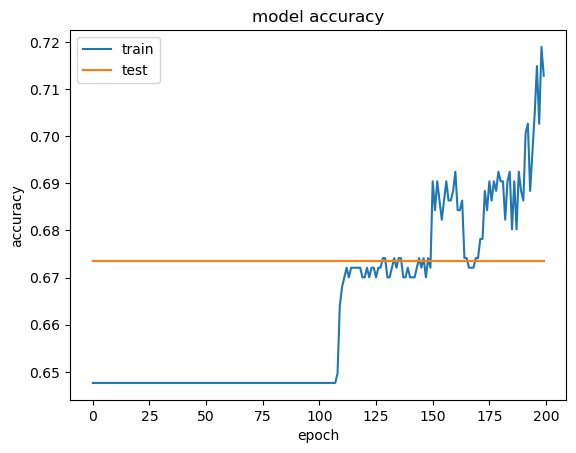

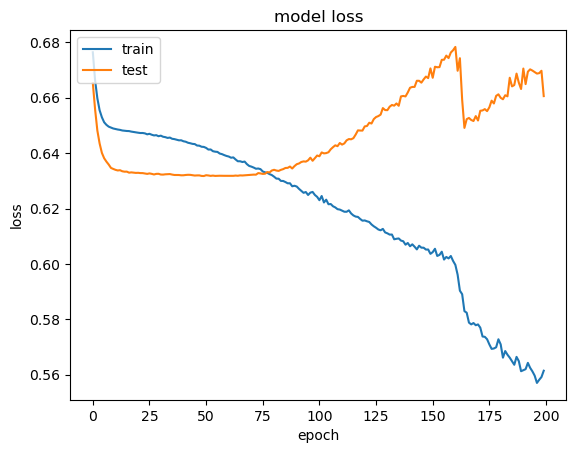

In [12]:
# summarize history for accuracy
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


## Varients for Gradient Descent Algorithm


| **Variant**                   | **Description**                                                                                              | **Applications**                                                                              | **Suitability**                                                                                                                    |
|-------------------------------|--------------------------------------------------------------------------------------------------------------|-----------------------------------------------------------------------------------------------|-------------------------------------------------------------------------------------------------------------------------------------|
| Batch Gradient Descent (BGD) | Updates weights after computing gradients over the entire dataset.                                           | Convex optimization, small to medium-sized datasets.                                         | Suitable for small to medium-sized datasets where computation of gradients is feasible.                                            |
| Stochastic Gradient Descent (SGD) | Updates weights after computing gradients for each training example.                                   | Large-scale machine learning, online learning, non-convex optimization.                        | Suitable for large datasets where computing gradients over the entire dataset is expensive. Can be noisy and may oscillate.       |
| Mini-Batch Gradient Descent   | Updates weights after computing gradients over a subset of training examples (mini-batch).                   | Deep learning, large-scale machine learning, balances between BGD and SGD.                     | Suitable for a balance between BGD and SGD, providing stable convergence.                                                          |
| Momentum                      | Uses a momentum term to accelerate SGD in the relevant direction and dampen oscillations.                    | Speed up convergence, escape local minima.                                                   | Suitable for SGD to converge faster and escape local minima.                                                                       |
| Nesterov Accelerated Gradient (NAG) | Improves momentum by looking ahead before updating weights.                                              | Faster convergence, improved accuracy.                                                       | Suitable for reducing oscillations and converging faster than standard momentum.                                                    |
| Adagrad                       | Adapts the learning rate for each parameter based on the historical gradients.                             | Sparse data, natural language processing.                                                    | Suitable for sparse data where some parameters receive frequent updates. May have aggressive learning rate decay.                |
| RMSprop                       | Addresses Adagrad's aggressive learning rate decay by using a moving average of squared gradients.         | Deep learning, neural networks.                                                              | Suitable for addressing Adagrad's issues with a more stable learning rate.                                                          |
| Adam                          | Combines ideas from momentum and RMSprop, using first and second moments of gradients to adaptively adjust learning rates. | Deep learning, neural networks, widely used in practice.                                    | Suitable for various deep learning architectures due to its efficiency and effectiveness.                                        |

Each variant has its strengths and weaknesses, and the choice of which to use depends on the specific problem, dataset size, and computational resources available.